In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2018-10-28 05:30:00         M  No RA/DZ
2018-10-05 10:00:00         M  No RA/DZ
2018-05-15 12:00:00         M  No RA/DZ
2018-06-05 08:00:00       -RA     RA/DZ
2018-10-07 14:00:00         M  No RA/DZ
2018-03-18 04:00:00       -UP  No RA/DZ
2018-03-06 21:30:00         M  No RA/DZ
2018-02-27 02:00:00         M  No RA/DZ
2018-08-14 12:30:00         M  No RA/DZ
2018-04-09 20:30:00       -RA     RA/DZ
2018-09-05 03:30:00         M  No RA/DZ
2018-12-26 07:30:00      BCFG  No RA/DZ
2018-06-10 14:00:00         M  No RA/DZ
2018-02-14 12:30:00        RA     RA/DZ
2018-11-30 22:00:00         M  No RA/DZ
2018-05-23 12:00:00         M  No RA/DZ
2018-09-03 10:00:00         M  No RA/DZ
2018-06-04 21:30:00         M  No RA/DZ
2018-09-21 01:30:00         M  No RA/DZ
2018-02-05 02:30:00         M  No RA/DZ
2018-04-19 15:30:00         M  No RA/DZ
2018-05-20 16:30:00         M  No RA/DZ
2018-08-14 20:30:00         M  No RA/DZ


No RA/DZ    91%
RA/DZ        9%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
#Load

model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,24224.912109,-0.048682,...,0.0,-0.001094,0.00,0.0,0.0,0.00,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 02:00:00,196.488373,0.0,613.525208,1.296904,11.657522,102834.796875,274.350494,0.946008,24224.343750,-0.377661,...,0.0,0.001953,0.00,0.0,0.0,0.00,5499.091797,1549.441040,245.285736,272.807495
2018-01-01 03:00:00,186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,24221.205078,0.422974,...,0.0,-0.004102,0.00,0.0,0.0,0.00,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,24219.220703,1.974560,...,0.0,-0.002734,0.00,0.0,0.0,0.00,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 05:00:00,194.010376,0.0,726.301025,4.055670,5.694401,102932.867188,275.172119,0.895605,24218.425781,2.065991,...,0.0,0.001211,0.00,0.0,0.0,0.00,5532.286133,1559.514038,246.827194,273.539368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1.414751,0.0,1970.248535,6.084242,7.562932,103258.039062,280.895203,0.730230,24041.951172,42.388092,...,0.0,0.001211,0.30,0.0,0.0,0.30,5738.210938,1633.965942,256.457489,283.896637
2018-12-31 20:00:00,356.427704,0.0,1936.104858,5.687714,7.142657,103287.882812,280.499054,0.743425,24041.025391,36.874725,...,0.0,-0.000898,0.20,0.0,0.0,0.20,5739.144043,1634.055054,256.369995,283.659424
2018-12-31 21:00:00,352.389984,0.0,1902.936279,5.291308,6.723206,103340.562500,280.019501,0.756728,24041.576172,31.069885,...,0.0,-0.003398,0.14,0.0,0.0,0.14,5741.472168,1636.801025,256.276123,283.307068


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-16 09:00:00,No RA/DZ,214.444916,0.0,1515.273438,2.995492,3.899224,102458.820312,279.559937,0.947925,24216.343750,...,0.000000,0.000453,0.000000,0.600000,0.000000,0.600000,5667.215820,1539.321045,259.161865,276.818604
2018-08-16 12:00:00,No RA/DZ,181.596680,0.0,2910.651367,2.990990,3.293088,101525.757812,299.749023,0.597737,24216.468750,...,1209.699951,-4.945039,0.200000,0.000000,0.000000,0.200000,5759.188965,1540.699951,261.288086,288.935425
2018-10-15 12:00:00,No RA/DZ,295.525848,0.0,1740.782471,1.801278,2.292701,100765.140625,289.307739,0.554548,24216.482422,...,0.000000,0.002930,0.000000,0.000000,0.101562,0.101562,5536.361816,1417.142944,256.418762,279.766785
2018-03-09 02:00:00,No RA/DZ,135.816803,0.0,1457.696533,6.647990,10.945312,101133.179688,280.035553,0.848006,24219.828125,...,0.000000,0.004570,0.000000,0.398438,0.156250,0.398438,5535.403809,1428.760986,255.400620,279.258484
2018-05-02 14:00:00,No RA/DZ,322.119537,0.0,1573.031128,5.902015,6.600666,101173.500000,289.084808,0.543470,24214.242188,...,13.560000,-1.122813,0.031250,0.039062,0.398438,0.398438,5530.416992,1456.781982,254.095062,278.766846
2018-04-26 22:00:00,No RA/DZ,338.972321,0.0,2069.132080,2.498886,3.769309,101759.382812,281.418701,0.904883,24216.246094,...,0.000000,0.000469,0.000000,0.000000,0.000000,0.000000,5653.110840,1503.389038,257.603088,284.753754
2018-02-24 08:00:00,No RA/DZ,115.441750,0.0,192.045197,2.345657,3.019367,101063.062500,271.198944,0.833116,24218.236328,...,0.000000,-0.000461,0.000000,0.000000,0.000000,0.000000,5357.008789,1373.702026,244.647385,270.509338
2018-07-27 22:00:00,No RA/DZ,352.939667,0.0,3032.263672,5.473720,8.716522,101365.000000,291.749146,0.948941,24213.431641,...,171.600006,-143.226562,0.000000,0.000000,0.000000,0.000000,5761.029785,1514.878052,264.602661,290.638397
2018-01-17 02:00:00,No RA/DZ,304.206055,0.0,1390.118164,1.189829,12.462864,102330.578125,280.813568,0.980124,24215.841797,...,30.120001,-0.705066,0.000000,0.759606,0.000000,0.759606,5628.568848,1530.107056,258.079407,275.589172


**Scatter plot significant meteorological variables and prec_l**

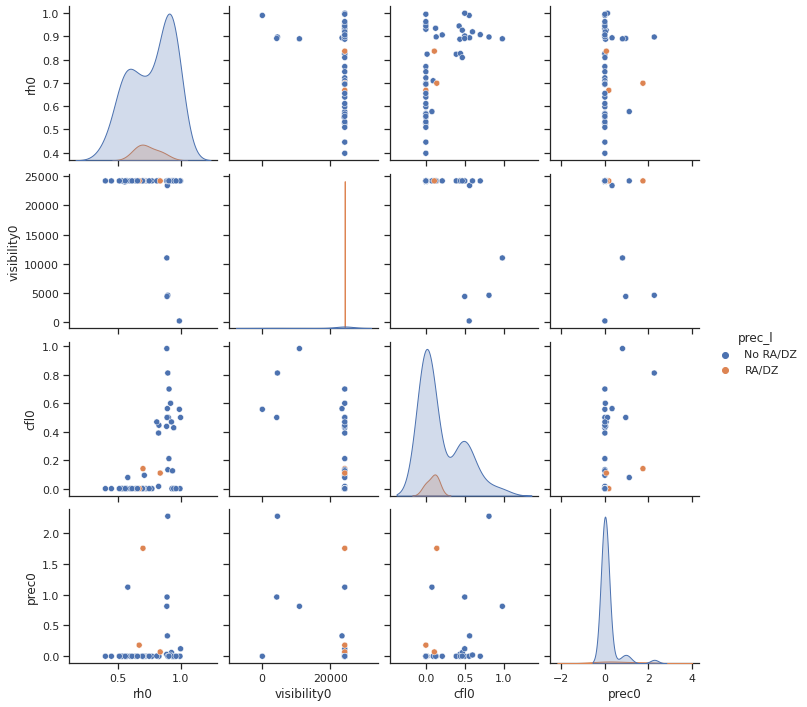

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

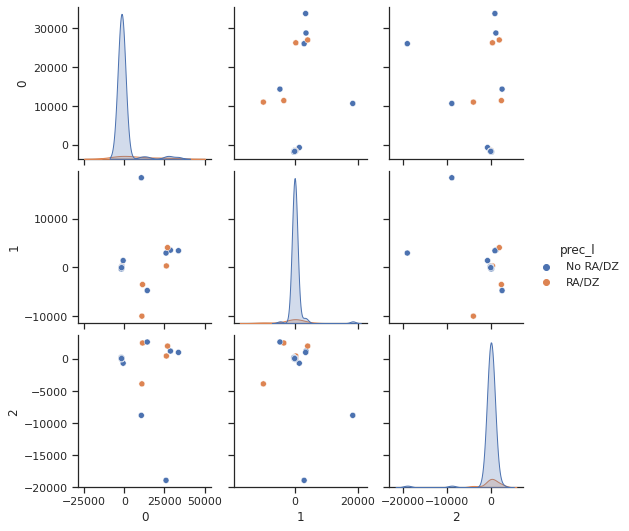

In [7]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [8]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      5767   1894  7661
RA/DZ           95    572   667
All           5862   2466  8328
Heidke Skill Score: 0.27

Quality report Meteorological model point 0
              precision    recall  f1-score      support
No RA/DZ       0.983794  0.752774  0.852917  7661.000000
RA/DZ          0.231955  0.857571  0.365145   667.000000
accuracy       0.761167  0.761167  0.761167     0.761167
macro avg      0.607874  0.805173  0.609031  8328.000000
weighted avg   0.923578  0.761167  0.813851  8328.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      5862   1799  7661
RA/DZ          100    567   667
All           5962   2366  8328
Heidke Skill Score: 0.28

Quality report Meteorological model point 1
              precision    recall  f1-score      support
No RA/DZ       0.983227  0.765174  0.860603  7661.000000
RA/DZ          0.239645  0.850075  0.373887   667.000000
ac

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [9]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 1.143539784928627e-249
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1138.927941657278
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [ ]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1468     63  1531
RA/DZ           58     77   135
All           1526    140  1666
Heidke Skill Score: 0.52

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.961992  0.958850  0.960419  1531.000000
RA/DZ          0.550000  0.570370  0.560000   135.000000
accuracy       0.927371  0.927371  0.927371     0.927371
macro avg      0.755996  0.764610  0.760209  1666.000000
weighted avg   0.928607  0.927371  0.927972  1666.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1450     78  1528
RA/DZ           54     84   138
All           1504    162  1666
Heidke Skill Score: 0.52

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.964096  0.948953  0.956464  1528.000000
RA/DZ          0.518519 

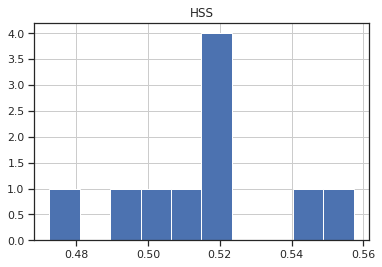

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.27) and at point 1 (0.28). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [11]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.27, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.52 0.52 0.5  0.47 0.49 0.51 0.55 0.52 0.52 0.56]

p_value point 0: 6.364313057185651e-11

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [12]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [ ]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1475     56  1531
RA/DZ           58     77   135
All           1533    133  1666
Heidke Skill Score: 0.54

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.962166  0.963423  0.962794  1531.000000
RA/DZ          0.578947  0.570370  0.574627   135.000000
accuracy       0.931573  0.931573  0.931573     0.931573
macro avg      0.770557  0.766896  0.768710  1666.000000
weighted avg   0.931113  0.931573  0.931340  1666.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1457     71  1528
RA/DZ           55     83   138
All           1512    154  1666
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.963624  0.953534  0.958553  1528.00000
RA/DZ          0.538961  0.6

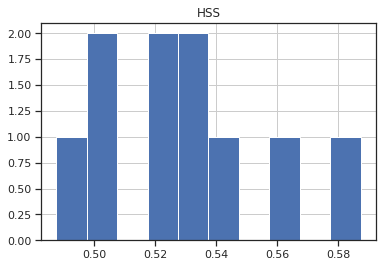

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [14]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.52  0.517 0.505 0.472 0.494 0.511 0.546 0.52  0.522 0.557]

HSS with time variables: [0.537 0.527 0.488 0.501 0.507 0.526 0.559 0.536 0.544 0.587]

alpha:  0.01

p_value point:  0.0029628454040399295

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [15]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 2.1%
snow_prec0: 0.1%
snowlevel0: 0.8%
mod0: 1.3%
wind_gust0: 1.7%
mslp0: 0.9%
temp0: 1.2%
rh0: 1.3%
visibility0: 1.3%
lhflx0: 1.1%
lwflx0: 1.0%
conv_prec0: 1.1%
prec0: 1.6%
swflx0: 0.7%
shflx0: 1.7%
cape0: 0.4%
cin0: 2.0%
cfh0: 1.7%
cfl0: 1.7%
cfm0: 1.9%
cft0: 1.4%
HGT5000: 1.0%
HGT8500: 0.6%
T5000: 0.9%
T8500: 0.8%
dir1: 1.7%
snow_prec1: 0.0%
snowlevel1: 0.9%
mod1: 1.5%
wind_gust1: 2.0%
mslp1: 1.0%
temp1: 1.0%
rh1: 1.8%
visibility1: 1.1%
lhflx1: 1.0%
lwflx1: 1.1%
conv_prec1: 0.8%
prec1: 2.7%
swflx1: 1.1%
shflx1: 1.8%
cape1: 1.7%
cin1: 1.7%
cfh1: 1.1%
cfl1: 1.2%
cfm1: 2.0%
cft1: 1.1%
HGT5001: 0.7%
HGT8501: 0.6%
T5001: 1.5%
T8501: 0.8%
dir2: 2.4%
snow_prec2: 0.4%
snowlevel2: 0.4%
mod2: 1.4%
wind_gust2: 1.3%
mslp2: 0.8%
temp2: 1.2%
rh2: 1.1%
visibility2: 1.4%
lhflx2: 1.5%
lwflx2: 2.0%
conv_prec2: 1.4%
prec2: 1.9%
swflx2: 0.8%
shflx2: 1.4%
cape2: 1.5%
cin2: 1.6%
cfh2: 1.6%
cfl2: 1.1%
cfm2: 1.5%
cft2: 1.3%
HGT5002: 0.6%
HGT8502: 0.6%
T5002: 0.8%
T8502: 0.9%
hour: 1.9%
month: 1.1%
da

****

**Save Machine learning model**

In [16]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEPP_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1458     73  1531
RA/DZ           55     80   135
All           1513    153  1666
Heidke Skill Score: 0.51

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.963648  0.952319  0.957950  1531.000000
RA/DZ          0.522876  0.592593  0.555556   135.000000
accuracy       0.923169  0.923169  0.923169     0.923169
macro avg      0.743262  0.772456  0.756753  1666.000000
weighted avg   0.927932  0.923169  0.925343  1666.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1476     66  1542
RA/DZ           41     83   124
All           1517    149  1666
Heidke Skill Score: 0.57

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.972973  0.957198  0.965021  1542.000000
RA/DZ          0.557047  0

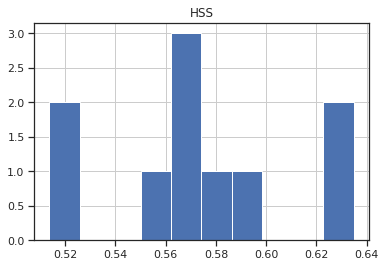

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [18]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.537 0.527 0.488 0.501 0.507 0.526 0.559 0.536 0.544 0.587]

HSS with ExtraTreesClassifier: [0.514 0.573 0.569 0.57  0.517 0.592 0.635 0.626 0.579 0.561]

alpha:  0.01

p_value point:  0.005996512781804968

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
